Loading and Preparing the Dataset

In [ ]:
# Load built-in Titanic dataset
data("Titanic")

# Convert it to a data frame
titanic_df <- as.data.frame(Titanic)
head(titanic_df)


,Class,Sex,Age,Survived,Freq
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1st,Male,Child,No,0
2,2nd,Male,Child,No,0
3,3rd,Male,Child,No,35
4,Crew,Male,Child,No,0
5,1st,Female,Child,No,0
6,2nd,Female,Child,No,0


Histogram of Number of Parents/Children Aboard

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



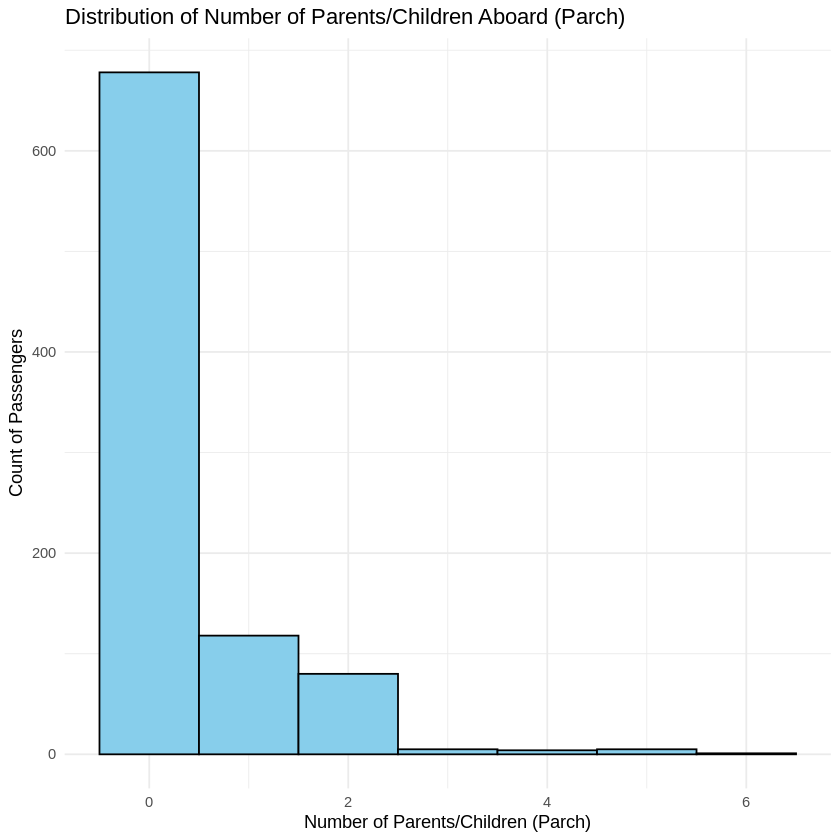

In [ ]:
install.packages("titanic")
library(titanic)

data <- titanic_train

# Histogram of Parch
library(ggplot2)

ggplot(data, aes(x = Parch)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Number of Parents/Children Aboard (Parch)",
       x = "Number of Parents/Children (Parch)",
       y = "Count of Passengers") +
  theme_minimal()


Detailed EDA — Explore Factors Influencing Survival

1. Overview of survival rates

In [ ]:
# Total survivors vs non-survivors
aggregate(Freq ~ Survived, data = titanic_df, sum)


Survived,Freq
<fct>,<dbl>
No,1490
Yes,711


2. Survival by Gender

In [ ]:
aggregate(Freq ~ Sex + Survived, data = titanic_df, sum)


Sex,Survived,Freq
<fct>,<fct>,<dbl>
Male,No,1364
Female,No,126
Male,Yes,367
Female,Yes,344


3. Survival by Class

In [ ]:
aggregate(Freq ~ Class + Survived, data = titanic_df, sum)


Class,Survived,Freq
<fct>,<fct>,<dbl>
1st,No,122
2nd,No,167
3rd,No,528
Crew,No,673
1st,Yes,203
2nd,Yes,118
3rd,Yes,178
Crew,Yes,212


4. Combine factors (Class, Sex, and Age)

In [ ]:
aggregate(Freq ~ Class + Sex + Age + Survived, data = titanic_df, sum)


Class,Sex,Age,Survived,Freq
<fct>,<fct>,<fct>,<fct>,<dbl>
1st,Male,Child,No,0
2nd,Male,Child,No,0
3rd,Male,Child,No,35
Crew,Male,Child,No,0
1st,Female,Child,No,0
2nd,Female,Child,No,0
3rd,Female,Child,No,17
Crew,Female,Child,No,0
1st,Male,Adult,No,118


Customized Boxplot — Age Distribution of Survivors and Non-Survivors

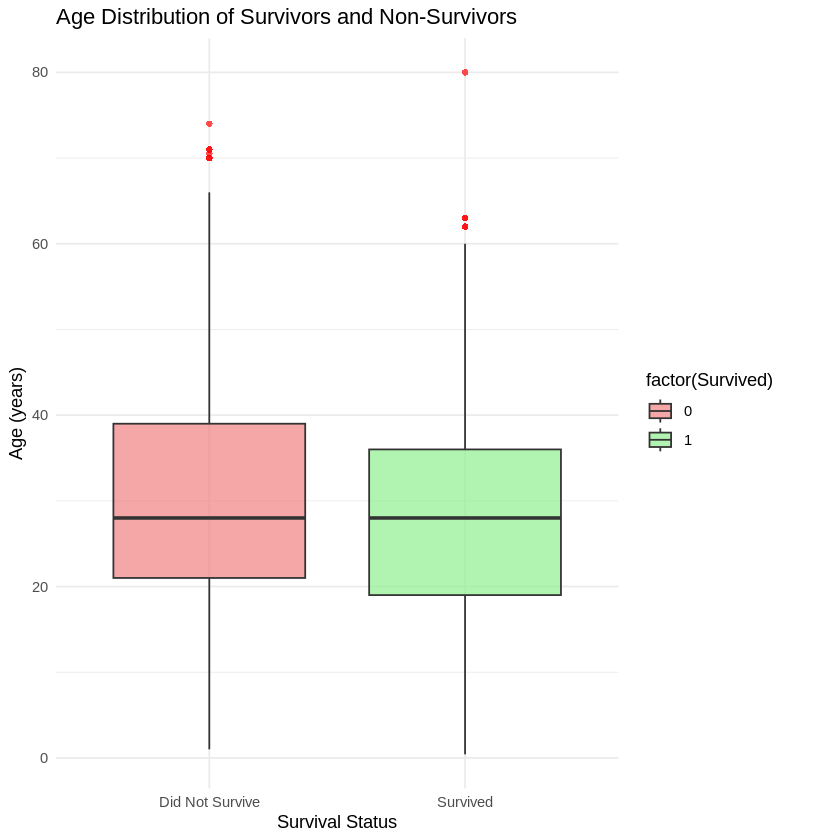

In [ ]:
data <- titanic_train

# Removing missing ages
data <- subset(data, !is.na(Age))


ggplot(data, aes(x = factor(Survived, labels = c("Did Not Survive", "Survived")),
                 y = Age, fill = factor(Survived))) +
  geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.shape = 16) +
  labs(title = "Age Distribution of Survivors and Non-Survivors",
       x = "Survival Status",
       y = "Age (years)") +
  scale_fill_manual(values = c("lightcoral", "lightgreen")) +
  theme_minimal()


**SUMMARY OF EDA**

| Factor | Observation                          | Statistical Significance                  |
| ------ | ------------------------------------ | ----------------------------------------- |
| Gender | Females had higher survival rate     | (p < 0.05)                              |
| Class  | 1st class passengers survived more   | (p < 0.05)                              |
| Age    | Younger passengers survived more     | (t-test, if applied to `titanic_train`) |
| Parch  | Most passengers had no family aboard | Descriptive                               |
